# AdaBoost classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Classification methods

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


In [2]:
home_path = os.path.abspath(os.getcwd())
home_path

'c:\\Users\\User\\OneDrive\\Documenti\\Uni_nuovo\\Necst\\NL2project\\FDAxEEG\\Dataset'

In [16]:
colnames = ['int_z1_b0', 'int_z1_b1', 'int_z1_b2', 'int_z1_b3', 
            'int_z3_b4', 'int_z4_b4', 'int_z5_b4', 'int_z6_b0', 
            'int_z6_b1', 'int_z6_b2', 'int_z1_b3',
            'norm_z0_b3', 'norm_z1_b0', 'norm_z1_b1', 'norm_z1_b2',
            'norm_z1_b3', 'norm_z3_b4', 'norm_z4_b0', 'norm_z4_b4',
            'norm_z6_b0', 'norm_z6_b1', 'norm_z6_b2', 'norm_z6_b3',
            'pic_z0_b3', 'pic_z1_b2', 'pic_z1_b3', 'pic_z3_b4',
            'pic_z4_b4', 'pic_z5_b4', 'pic_z6_b0', 'pic_z6_b1',
            'pic_z6_b2', 'pic_z6_b3' ]


In [3]:
# creating the vector of the labels
y = np.append(np.ones((555, 1), dtype=int),np.zeros((427, 1), dtype=int))

### Qui  crea dataframes

In [18]:
# concatenating dataframe degli integrali delle derivate
int_adhd = pd.read_csv(home_path+'\Feat_int_adhd.csv', sep = ',')
int_cont = pd.read_csv(home_path+'\Feat_int_cont.csv', sep = ',')

df_int = pd.concat([int_adhd, int_cont])
df_int.shape

(982, 11)

In [19]:
# concatenating dataframe delle norme
norm_adhd = pd.read_csv(home_path+'\Feat_norm_adhd.csv', sep = ',')
norm_cont = pd.read_csv(home_path+'\Feat_norm_cont.csv', sep = ',')

df_norm = pd.concat([norm_adhd, norm_cont])
df_norm.shape

(982, 12)

In [20]:
# concatenating dataframe dei picchi
picco_adhd = pd.read_csv(home_path+'\Feat_picco_adhd.csv', sep = ',')
picco_cont = pd.read_csv(home_path+'\Feat_picco_cont.csv', sep = ',')

df_picco = pd.concat([picco_adhd, picco_cont])
df_picco.shape

(982, 10)

In [21]:
# concatenating the three daframes along the columns

df = pd.concat([df_int, df_norm, df_picco], axis=1)
df.shape

(982, 33)

In [22]:
df.columns = colnames
df.head()

,int_z1_b0,int_z1_b1,int_z1_b2,int_z1_b3,int_z3_b4,int_z4_b4,int_z5_b4,int_z6_b0,int_z6_b1,int_z6_b2,...,pic_z0_b3,pic_z1_b2,pic_z1_b3,pic_z3_b4,pic_z4_b4,pic_z5_b4,pic_z6_b0,pic_z6_b1,pic_z6_b2,pic_z6_b3
0,21.968998,190.785059,927.151960,2501.529995,6377.752911,7350.304875,19461.824368,24.198602,129.886119,751.636155,...,818.055908,368.676758,1262.890259,5884.943848,7414.490723,18736.572266,11.715752,58.981052,309.610992,882.263916
1,20.174632,167.368626,753.313695,1584.194779,3668.469256,3375.189621,10150.997673,49.278778,222.241724,1060.458811,...,497.234131,254.854523,697.317871,3458.279297,3131.913818,10127.041016,14.928400,84.580544,423.909363,702.180603
2,18.676125,146.562516,819.394027,1317.382080,2429.409135,1707.388859,3808.516577,27.224983,211.900858,918.530408,...,426.164581,292.136841,599.598999,2358.657715,1672.325684,3500.131104,8.690989,80.464485,348.549347,674.208740
3,27.023251,134.220324,853.109891,1251.061716,2525.060220,1205.401089,1593.005146,29.762903,181.486521,1103.128694,...,579.769653,300.478455,610.236328,2198.085449,855.345947,1274.186890,11.514561,80.033195,423.814484,806.424622
4,38.532633,174.662249,918.740565,1327.294711,3631.285934,1706.316409,1830.648868,47.566680,185.767107,1339.031987,...,396.156830,342.757507,585.753784,3440.830078,1607.414795,1430.056519,16.043320,65.653732,521.064697,721.823975


In [23]:
df.to_csv(home_path+'\df_complete.csv', index = False, sep = ',')

### Qui carico dataframe già fatto

In [4]:
df = pd.read_csv(home_path+'\df_complete.csv', sep = ',')

## Classification

In [5]:
np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(df, y,
    test_size= 1/4.0, random_state =1234, shuffle=True)

crossvalidation = StratifiedKFold(n_splits=10, shuffle=True)

In [6]:
n_estimators = df.shape[1]
n_estimators

33

In [24]:
method = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
    n_estimators=n_estimators)

xval_score = cross_val_score(method, X_train, y_train, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.826027397260274, 0.04502680186907448)

In [10]:
method.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=33)

In [11]:
yp = method.predict(X_test)
yprob = method.predict_proba(X_test)

print('Accuracy: '+str(accuracy_score(y_test, yp)))
print('Precision: '+str(precision_score(y_test, yp)))
print('Recall: '+str(recall_score(y_test, yp)))
print('F1 score: ' + str(f1_score(y_test, yp)))


Accuracy: 0.8292682926829268
Precision: 0.8823529411764706
Recall: 0.821917808219178
F1 score: 0.8510638297872339


In [23]:
print(confusion_matrix(y_test,yp, labels=[1,0]))
print(confusion_matrix(y_test,yp, labels=[1,0], normalize='true'))

[[118  28]
 [ 47  53]]
[[0.80821918 0.19178082]
 [0.47       0.53      ]]


<BarContainer object of 33 artists>

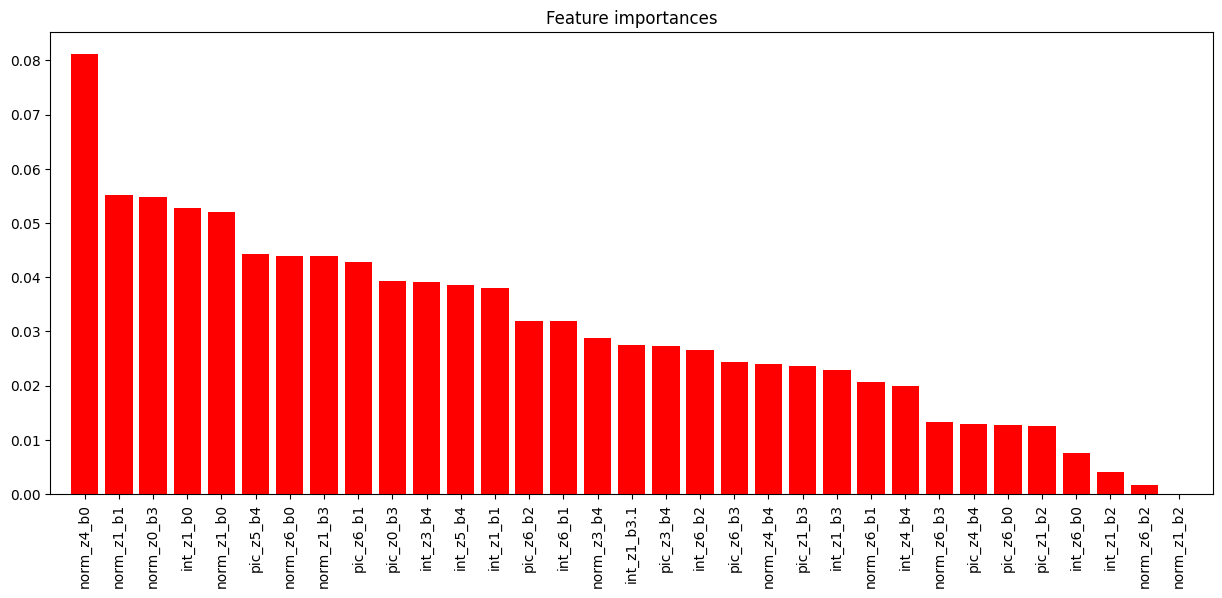

In [59]:
feat_imp = method.feature_importances_

indices = np.argsort(feat_imp)[::-1]

plt.rcParams["figure.figsize"] = (15,6)

plt.title("Feature importances")
plt.xticks(range(df.shape[1]),df.columns[indices],rotation='vertical')

plt.xlim([-1, df.shape[1]])

plt.bar(range(df.shape[1]), feat_imp[indices], color="r")


In [60]:
indices

array([17, 13, 11,  0, 12, 28, 19, 15, 30, 23,  4,  6,  1, 31,  8, 16, 10,
       26,  9, 32, 18, 25,  3, 20,  5, 22, 27, 29, 24,  7,  2, 21, 14],
      dtype=int64)

In [61]:
# reducing the dataframe

col_mantain = indices[0:20]
X_train_red = X_train.iloc[:,col_mantain]
X_test_red = X_test.iloc[:,col_mantain]

n_estimators_red = 20


# fit the model on the reduced dataframe
method = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
    n_estimators=n_estimators_red)

xval_score = cross_val_score(method, df.iloc[:,col_mantain], y, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd


(0.812605648319934, 0.037190358258851364)

In [62]:
method.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=20)

In [63]:
yp = method.predict(X_test)
yprob = method.predict_proba(X_test)

print('Accuracy: '+str(accuracy_score(y_test, yp)))
print('Precision: '+str(precision_score(y_test, yp)))
print('Recall: '+str(recall_score(y_test, yp)))
print('F1 score: ' + str(f1_score(y_test, yp)))

Accuracy: 0.8170731707317073
Precision: 0.8686131386861314
Recall: 0.815068493150685
F1 score: 0.8409893992932863


i risultati sono peggiori, mantengo tutte le features

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [8]:
# prove con altri classificatori

method = RandomForestClassifier(n_estimators=n_estimators,max_depth=3,oob_score=True)

xval_score = cross_val_score(method, df, y, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.7108122036693466, 0.04347615484442906)

In [9]:
method.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=33, oob_score=True)

In [10]:
yp = method.predict(X_test)
yprob = method.predict_proba(X_test)

print('Accuracy: '+str(accuracy_score(y_test, yp)))
print('Precision: '+str(precision_score(y_test, yp)))
print('Recall: '+str(recall_score(y_test, yp)))
print('F1 score: ' + str(f1_score(y_test, yp)))

Accuracy: 0.7073170731707317
Precision: 0.725609756097561
Recall: 0.815068493150685
F1 score: 0.767741935483871


In [11]:
# prove con altri classificatori

method = BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators)

xval_score = cross_val_score(method, df, y, cv = crossvalidation)

accuracy_mean = np.average(xval_score)
accuracy_sd = np.std(xval_score)

accuracy_mean, accuracy_sd

(0.7281179138321996, 0.055241067907865246)

In [12]:
method.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=33)

In [13]:
yp = method.predict(X_test)
yprob = method.predict_proba(X_test)

print('Accuracy: '+str(accuracy_score(y_test, yp)))
print('Precision: '+str(precision_score(y_test, yp)))
print('Recall: '+str(recall_score(y_test, yp)))
print('F1 score: ' + str(f1_score(y_test, yp)))

Accuracy: 0.6869918699186992
Precision: 0.7197452229299363
Recall: 0.773972602739726
F1 score: 0.7458745874587459
